In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [9]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [10]:
start='2012-05-18 '
end='2021-12-30'
df = data.DataReader('META', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [11]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-23,336.670013,328.359985,330.100006,335.239990,13987700,335.239990
2021-12-27,347.869995,338.010010,338.850006,346.179993,17795000,346.179993
2021-12-28,352.709991,345.200012,346.630005,346.220001,16637600,346.220001
2021-12-29,349.690002,341.640015,346.910004,342.940002,10747000,342.940002
2021-12-30,347.230011,343.220001,344.000000,344.359985,10593300,344.359985


In [12]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
1,2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2,2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
3,2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
4,2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [13]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,45.000000,38.000000,42.049999,38.230000,573576400
1,36.660000,33.000000,36.529999,34.029999,168192700
2,33.590000,30.940001,32.610001,31.000000,101786600
3,32.500000,31.360001,31.370001,32.000000,73600000
4,33.209999,31.770000,32.950001,33.029999,50237200


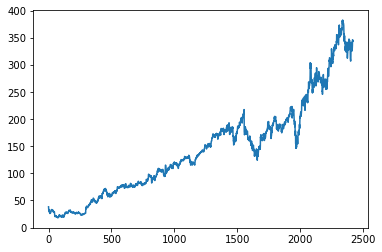

In [14]:
plt.plot(df.Close)

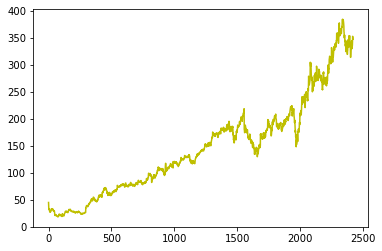

In [15]:
plt.plot(df.High, 'y')

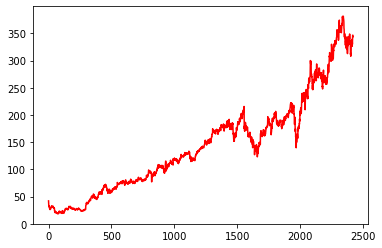

In [16]:
plt.plot(df.Open, 'r')

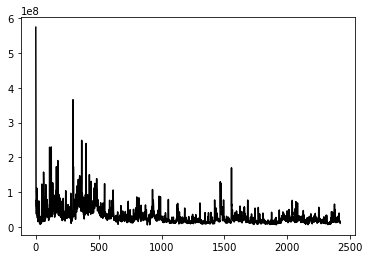

In [17]:
plt.plot(df.Volume, 'black')

In [18]:
df

,High,Low,Open,Close,Volume
0,45.000000,38.000000,42.049999,38.230000,573576400
1,36.660000,33.000000,36.529999,34.029999,168192700
2,33.590000,30.940001,32.610001,31.000000,101786600
3,32.500000,31.360001,31.370001,32.000000,73600000
4,33.209999,31.770000,32.950001,33.029999,50237200
...,...,...,...,...,...
2416,336.670013,328.359985,330.100006,335.239990,13987700
2417,347.869995,338.010010,338.850006,346.179993,17795000
2418,352.709991,345.200012,346.630005,346.220001,16637600
2419,349.690002,341.640015,346.910004,342.940002,10747000


In [19]:
ma300 = df.Close.rolling(300).mean()
ma300

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2416    312.787300
2417    313.054800
2418    313.337533
2419    313.588800
2420    313.807567
Name: Close, Length: 2421, dtype: float64

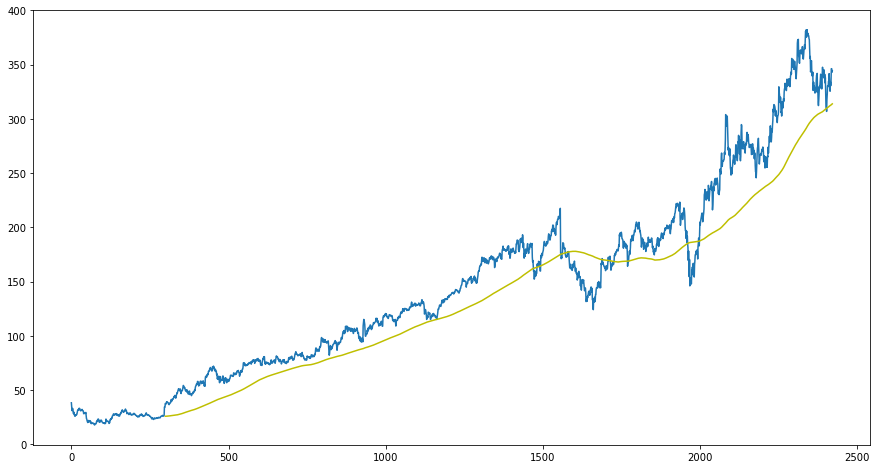

In [20]:
plt.figure(figsize = (15,8))
plt.plot(df.Close)
plt.plot(ma300, 'y')

In [21]:
ma500 = df.Close.rolling(500).mean()
ma500

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2416    277.11842
2417    277.39122
2418    277.66632
2419    277.92700
2420    278.18960
Name: Close, Length: 2421, dtype: float64

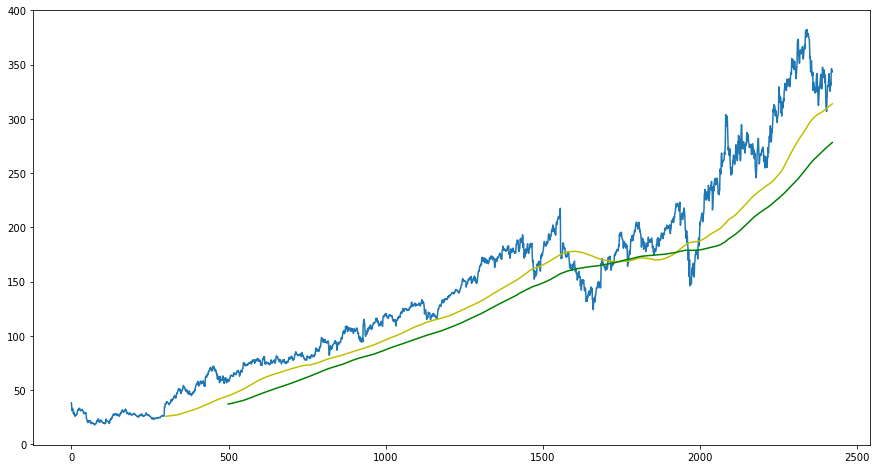

In [22]:
plt.figure(figsize = (15,8))
plt.plot(df.Close)
plt.plot(ma300, 'y')
plt.plot(ma500, 'g')

In [23]:
ma1000 = df.Close.rolling(1000).mean()
ma1000

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2416    226.83069
2417    226.99002
2418    227.14796
2419    227.30303
2420    227.45955
Name: Close, Length: 2421, dtype: float64

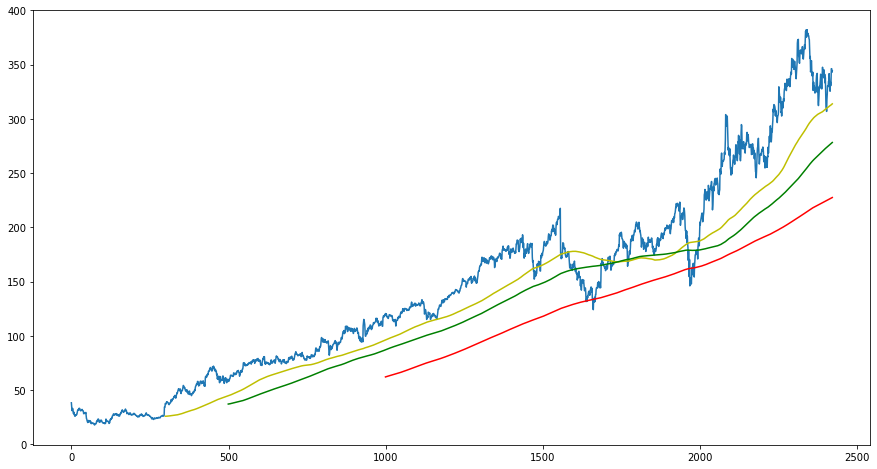

In [24]:
plt.figure(figsize = (15,8))
plt.plot(df.Close)
plt.plot(ma300, 'y')
plt.plot(ma500, 'g')
plt.plot(ma1000, 'r')

In [25]:
df.shape

(2421, 5)

# Splitting Data Into Training & Testing

In [26]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1694, 1)
(727, 1)


In [27]:
data_training.head()

,Close
0,38.230000
1,34.029999
2,31.000000
3,32.000000
4,33.029999


In [28]:
data_testing.head()

,Close
1694,164.070007
1695,163.949997
1696,162.500000
1697,162.289993
1698,162.559998


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.10261801],
       [0.08159383],
       [0.06642639],
       ...,
       [0.7488612 ],
       [0.74115229],
       [0.73739797]])

In [31]:
data_training_array.shape

(1694, 1)

In [32]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
x_train.shape

(1594, 100, 1)

# ML MODEL

In [34]:
!pip install keras

In [35]:
!pip install Dropout

ERROR: Could not find a version that satisfies the requirement Dropout (from versions: none)
ERROR: No matching distribution found for Dropout


In [36]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [37]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [39]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
50/50 [==============================] - 25s 226ms/step - loss: 0.0447
Epoch 2/50
50/50 [==============================] - 11s 217ms/step - loss: 0.0100
Epoch 3/50
50/50 [==============================] - 11s 226ms/step - loss: 0.0078
Epoch 4/50
50/50 [==============================] - 11s 220ms/step - loss: 0.0070
Epoch 5/50
50/50 [==============================] - 11s 216ms/step - loss: 0.0063
Epoch 6/50
50/50 [==============================] - 10s 206ms/step - loss: 0.0062
Epoch 7/50
50/50 [==============================] - 12s 235ms/step - loss: 0.0068
Epoch 8/50
50/50 [==============================] - 13s 258ms/step - loss: 0.0057
Epoch 9/50
50/50 [==============================] - 12s 239ms/step - loss: 0.0054
Epoch 10/50
50/50 [==============================] - 12s 248ms/step - loss: 0.0045
Epoch 11/50
50/50 [==============================] - 13s 257ms/step - loss: 0.0051
Epoch 12/50
50/50 [==============================] - 12s 245ms/step - loss: 0.0050
Epoch 13/50
5

In [40]:
model.save('keras_model.h5')

In [41]:
data_testing.head()

,Close
1694,164.070007
1695,163.949997
1696,162.500000
1697,162.289993
1698,162.559998


In [42]:
data_training.tail(100)

,Close
1594,163.059998
1595,166.020004
1596,162.929993
1597,165.410004
1598,164.910004
...,...
1689,170.490005
1690,166.380005
1691,167.330002
1692,165.789993


In [43]:
past_100_days = data_training.tail(100)

In [44]:
final_df = past_100_days.append(data_testing, ignore_index= True)

In [45]:
final_df.head()

,Close
0,163.059998
1,166.020004
2,162.929993
3,165.410004
4,164.910004


In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.15109252],
       [0.16256008],
       [0.15058886],
       [0.16019683],
       [0.15825975],
       [0.16616303],
       [0.1734852 ],
       [0.15651639],
       [0.14869055],
       [0.13664189],
       [0.14865177],
       [0.13478231],
       [0.12889356],
       [0.12858362],
       [0.1311018 ],
       [0.10584227],
       [0.11347439],
       [0.11498531],
       [0.11413299],
       [0.13451109],
       [0.13699055],
       [0.1195568 ],
       [0.11618629],
       [0.11901442],
       [0.1175035 ],
       [0.08515418],
       [0.10417635],
       [0.08255849],
       [0.06985123],
       [0.08585156],
       [0.10743064],
       [0.1072757 ],
       [0.10185189],
       [0.09538198],
       [0.10026346],
       [0.10642338],
       [0.09224391],
       [0.08097013],
       [0.0677592 ],
       [0.07012245],
       [0.07810322],
       [0.0766698 ],
       [0.05993337],
       [0.02901753],
       [0.03242676],
       [0.04168608],
       [0.02971485],
       [0.047

In [47]:
input_data.shape

(827, 1)

In [48]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [49]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(727, 100, 1)
(727,)


# Making Predictions

In [50]:
y_predicted = model.predict(x_test)

In [51]:
y_predicted.shape

(727, 1)

In [52]:
y_test

array([0.15500546, 0.15454052, 0.14892299, 0.14810939, 0.14915543,
       0.13939252, 0.14655975, 0.15713621, 0.15523791, 0.15012398,
       0.14485511, 0.14807067, 0.16779017, 0.18286068, 0.18770339,
       0.17460874, 0.1764296 , 0.1859988 , 0.18541764, 0.19103517,
       0.17863785, 0.16240508, 0.14105844, 0.14532005, 0.16031305,
       0.16279252, 0.15605145, 0.16360606, 0.16899115, 0.16197892,
       0.16073922, 0.16515576, 0.17294282, 0.19425074, 0.19169377,
       0.20130175, 0.20013949, 0.19707886, 0.20734544, 0.20827526,
       0.20707422, 0.21323419, 0.21536494, 0.21234309, 0.21199443,
       0.21005735, 0.22229973, 0.23136527, 0.22671628, 0.26809235,
       0.26123512, 0.2739811 , 0.26863473, 0.26720131, 0.26526423,
       0.27665429, 0.27049438, 0.25457155, 0.25368045, 0.25023244,
       0.24903146, 0.22268711, 0.21954904, 0.24101196, 0.24380137,
       0.23725402, 0.22725866, 0.23539443, 0.23733152, 0.22009143,
       0.22082753, 0.23341857, 0.22520535, 0.22838214, 0.20691

In [53]:
y_predicted

array([[0.14992529],
       [0.15434827],
       [0.15861657],
       [0.16268674],
       [0.16652003],
       [0.17008705],
       [0.17336184],
       [0.17632127],
       [0.17895272],
       [0.18127383],
       [0.18330331],
       [0.18505785],
       [0.18654501],
       [0.187805  ],
       [0.18890482],
       [0.18991993],
       [0.19089633],
       [0.19186337],
       [0.19285156],
       [0.19388007],
       [0.19495985],
       [0.19608706],
       [0.19723064],
       [0.19833331],
       [0.19934054],
       [0.20022042],
       [0.20095965],
       [0.20154974],
       [0.20199268],
       [0.20230322],
       [0.2025002 ],
       [0.20259923],
       [0.20262104],
       [0.20259307],
       [0.20257516],
       [0.20262402],
       [0.20280221],
       [0.20315495],
       [0.20368783],
       [0.20442085],
       [0.20536482],
       [0.20651272],
       [0.207848  ],
       [0.20934579],
       [0.21097288],
       [0.21269095],
       [0.21445937],
       [0.216

In [54]:
scaler.scale_

array([0.00387417])

In [55]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

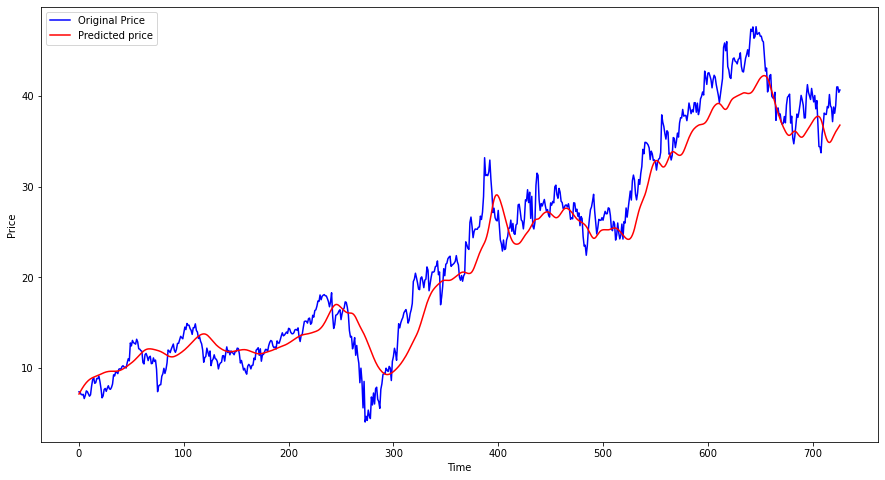

In [56]:
plt.figure(figsize=(15,8))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()